In [72]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the processed data for M10smol
df = pd.read_csv('../../Data/GeneratedData/m10smol_data.csv')

df.head()

,# episode,total_reward,max_reward,ending_time,planes_taken_off,planes_landed,planes_encountered,go_arounds,crashes,processed_planes,reward_efficiency
0,0,279.45,387.5,1411,6,2,10,1,0,0.8,0.721161
1,1,277.15,412.5,1257,4,4,10,1,2,0.8,0.671879
2,2,278.60,437.5,1428,4,3,10,1,0,0.7,0.636800
3,3,250.65,462.5,1487,3,3,10,3,0,0.6,0.541946
4,4,235.35,437.5,1293,4,2,10,3,0,0.6,0.537943


## Processed Planes for M10smol

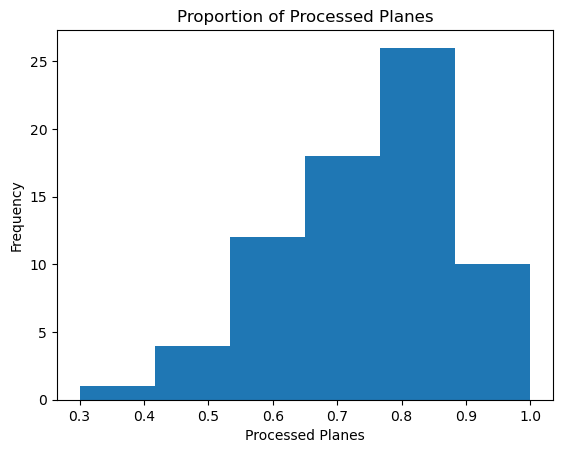

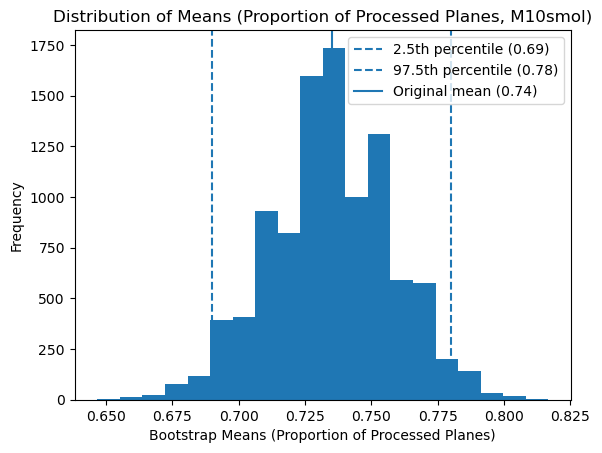

In [73]:
processed_planes = df['processed_planes'].to_numpy()
processed_planes = processed_planes[~np.isnan(processed_planes)]

plt.figure()
plt.hist(processed_planes, bins=6)
plt.title("Proportion of Processed Planes")
plt.xlabel("Processed Planes")
plt.ylabel("Frequency")
plt.show()

boots = []
for _ in range(10000):
    sample = np.random.choice(processed_planes, size=30, replace=True)
    boots.append(np.mean(sample))

lower = np.percentile(boots, 2.5)
upper = np.percentile(boots, 97.5)
obs_mean = np.mean(processed_planes)

plt.figure()
plt.hist(boots, bins=20)
plt.axvline(lower, linestyle='--', label=f"2.5th percentile ({lower:.2f})")
plt.axvline(upper, linestyle='--', label=f"97.5th percentile ({upper:.2f})")
plt.axvline(obs_mean, linestyle='-', label=f"Original mean ({obs_mean:.2f})")
plt.title("Distribution of Means (Proportion of Processed Planes, M10smol)")
plt.xlabel("Bootstrap Means (Proportion of Processed Planes)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## Crash Rate for M10smol

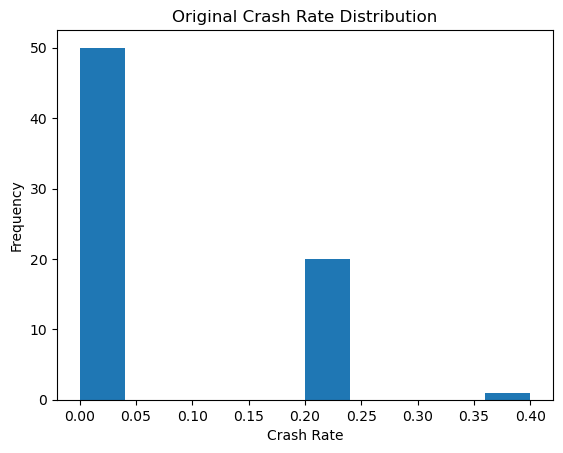

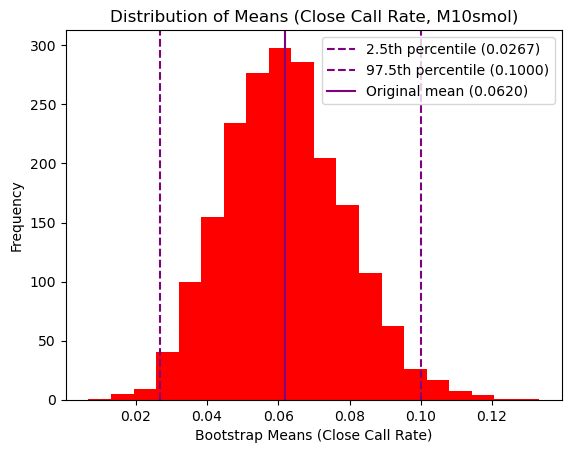

In [78]:
df['crash_rate'] = df['crashes'] / df['planes_encountered']
crash_rate = df['crash_rate'].to_numpy()
crash_rate = crash_rate[~np.isnan(crash_rate)]

plt.figure()
plt.hist(crash_rate)
plt.title("Original Crash Rate Distribution")
plt.xlabel("Crash Rate")
plt.ylabel("Frequency")
plt.show()

boots = []
for _ in range(2000):
	sample = np.random.choice(crash_rate, size=30, replace=True)
	boots.append(np.mean(sample))

lower = np.percentile(boots, 2.5)
upper = np.percentile(boots, 97.5)
obs_mean = np.mean(crash_rate)

plt.figure()
plt.hist(boots, bins=20, color='red')
plt.axvline(lower, linestyle='--', label=f"2.5th percentile ({lower:.4f})", color='purple')
plt.axvline(upper, linestyle='--', label=f"97.5th percentile ({upper:.4f})", color='purple')
plt.axvline(obs_mean, linestyle='-', label=f"Original mean ({obs_mean:.4f})", color='purple')
plt.title("Distribution of Means (Close Call Rate, M10smol)")
plt.xlabel("Bootstrap Means (Close Call Rate)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


## Early Times Distribution

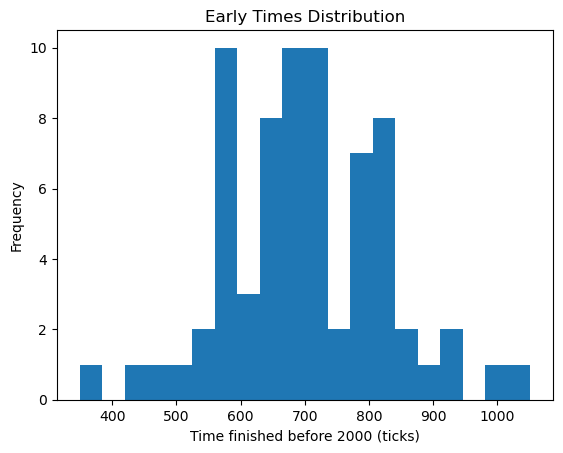

In [81]:
# Early times for M10
early = 2000 - df['ending_time'].to_numpy()

early = early[~np.isnan(early)]

plt.figure()
plt.hist(early, bins=20)
plt.title("Early Times Distribution")
plt.xlabel("Time finished before 2000 (ticks)")
plt.ylabel("Frequency")
plt.show()

boots = []
for _ in range(2000):
	sample = np.random.choice(early, size=30, replace=True)
	boots.append(np.mean(sample))

lower = np.percentile(boots, 2.5)
upper = np.percentile(boots, 97.5)
obs_mean = np.mean(early)